In [1]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [2]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [4]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir('../'):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append("../"+folder)
            else:
                all_models[num_mixtures] = ["../"+folder]
            
    return all_models
            
print(get_all_models())

{1: ['../trained_sequential_rnn_1mixtures_run10', '../trained_sequential_rnn_1mixtures_run5', '../trained_sequential_rnn_1mixtures_run2', '../trained_sequential_rnn_1mixtures_run7', '../trained_sequential_rnn_1mixtures_run11', '../trained_sequential_rnn_1mixtures_run13', '../trained_sequential_rnn_1mixtures_run9', '../trained_sequential_rnn_1mixtures_run1', '../trained_sequential_rnn_1mixtures_run14', '../trained_sequential_rnn_1mixtures_run6', '../trained_sequential_rnn_1mixtures_run3', '../trained_sequential_rnn_1mixtures_run12', '../trained_sequential_rnn_1mixtures_run8', '../trained_sequential_rnn_1mixtures_run4'], 2: ['../trained_sequential_rnn_2mixtures_run12', '../trained_sequential_rnn_2mixtures_run3', '../trained_sequential_rnn_2mixtures_run11', '../trained_sequential_rnn_2mixtures_run13', '../trained_sequential_rnn_2mixtures_run7', '../trained_sequential_rnn_2mixtures_run8', '../trained_sequential_rnn_2mixtures_run2', '../trained_sequential_rnn_2mixtures_run14', '../trained_s

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [6]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Unfinished run. Skipping.
Unfinished run. Skipping.
Loading model:  ../trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 32, 32)   416         conv2d_61[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 32, 32, 32)   416         conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 32, 32, 32)   416         conv2d_101[0][0]                 
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 32, 32, 32)   416         conv2d_121[0][0]                 
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_141 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 32, 32, 32)   416         conv2d_141[0][0]                 
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 32, 32, 32)   416         conv2d_161[0][0]                 
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run14
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_181 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_182 (Conv2D)             (None, 32, 32, 32)   416         conv2d_181[0][0]                 
__________________________________________________________________________________________________
conv2d_183 (Conv2D)             (None, 16, 16, 32)   4128       

In [7]:
#Get a start video
#Getting data to feed into the VAE and RNN
import numpy as np
import os
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']

episode_num = 16
single_action_sequence = action_data[episode_num]
single_latent_sequence = observation_data[episode_num]
print("Actions length: ", len(single_action_sequence))
print("Latent vectors length: ", len(single_latent_sequence))
num_frames = len(single_latent_sequence)



#Decode all 100 vectors, store as video
#Visualize video.

Actions length:  177
Latent vectors length:  177


In [8]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

In [9]:
def calc_mixture_weights_and_events_dreaming(rnn_analyzer, dream_steps=100):
    #Analyzing a single model
    WARM_UP_STEPS = 100
    previous_z = single_latent_sequence[WARM_UP_STEPS]

    mixture_weight_history = []
    z_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(single_action_sequence, single_latent_sequence)
    for i in range(dream_steps):
        previous_z, mixture_weights = rnn_analyzer.predict_one_step(0, previous_z)
        z_history.append(previous_z)
        mixture_weight_history.append(mixture_weights)
    return np.array(mixture_weight_history), np.array(z_history)

In [10]:
def visualize_mixture_weights_and_events(weights_sequence, z_sequence, rnn_analyzer):
    plt.plot(weights_sequence)
    plt.figure(figsize=(20,10))
    columns = 4
    counter = 0
    skip_image = 5
    decoded_images = rnn_analyzer.decode_with_vae(z_sequence)
    plot_counter = 0
    for d in decoded_images:
        if counter%skip_image == 0:
            if plot_counter%columns == 0:
                print("Timestep: ", counter)
            plt.subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            plt.imshow(d)
            plot_counter+=1
        counter+=1

zs are  [[-0.24739423 -0.47015784  0.16177652 ...  1.26779808  0.48017275
   0.87756648]
 [-0.170774   -0.05138045  0.08072374 ...  1.01229415  0.48098206
   0.73742105]
 [-0.28137982 -0.38998461  0.14107792 ...  1.08671397  0.50665283
   0.83785126]
 ...
 [ 1.35090712 -0.57377521  0.08785192 ...  0.5359068   1.05841133
   0.68621935]
 [ 1.45356599 -0.51994053  0.03518792 ...  0.53970769  1.12548265
   0.75990826]
 [ 1.33691906 -0.45818374  0.05545991 ...  0.54093633  1.09918973
   0.60368747]]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80


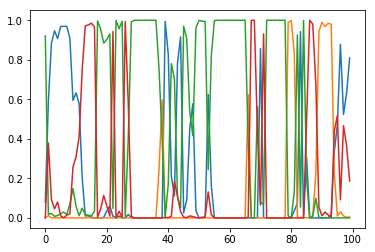

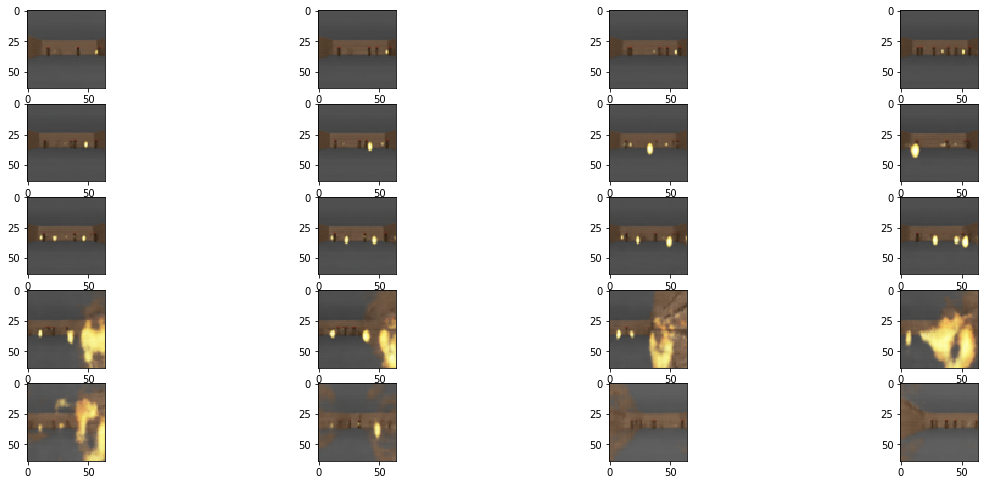

In [56]:
analyzer1= rnn_analyzers[4][7]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer1)
print("zs are ", zs)
visualize_mixture_weights_and_events(weights, zs, analyzer1)


In [64]:
new_analyzer = analyze_rnn_predictions.RNNAnalyzer("../trained_sequential_rnn_4mixtures_run9/rnn_trained_model.h5", 4, 0.01)
weights, zs = calc_mixture_weights_and_events_dreaming(new_analyzer)
decoded_images = new_analyzer.decode_with_vae(zs)
plot_movie_mp4(decoded_images)

VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_206 (Conv2D)             (None, 32, 32, 32)   416         conv2d_205[0][0]                 
__________________________________________________________________________________________________
conv2d_207 (Conv2D)             (None, 16, 16, 32)   4128        conv2d_206[0][0]                 
_______________________

<Figure size 64x64 with 0 Axes>

In [11]:
import count_monsters_and_balls
import numpy as np
import collections
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39

def count_appearances_of_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][1]

def name_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][0]

#This measures how often the same event is captured by the same mixture.
#However, that is not enough: We also need to make sure the handling of the event is
#unique to that mixture. That is, we have to measure if that mixture also handles other events.
def measure_dominating_mixture_for_events(analyzer, num_steps = 100):
    # Measuring the tendency for different events to be modelled by different gaussians
    weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,num_steps)
    dominating_mixture_during_explosions = []
    dominating_mixture_during_fireball = []
    dominating_mixture_during_wall_left = []
    dominating_mixture_during_wall_right = []
    dominating_mixture_otherwise = []

    decoded_images = analyzer.decode_with_vae(zs)
    visualize_mixture_weights_and_events(weights, zs, analyzer)
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        weight_vector = weights[img_counter]
        dominating_mixture = np.argmax(weight_vector)
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        no_events_seen = True
        if is_exploding:
            dominating_mixture_during_explosions.append(dominating_mixture)
            no_events_seen = False
        elif is_fireball:
            dominating_mixture_during_fireball.append(dominating_mixture)
            no_events_seen = False
        elif is_left_wall:
            dominating_mixture_during_wall_left.append(dominating_mixture)
            no_events_seen = False
        elif is_right_wall:
            dominating_mixture_during_wall_right.append(dominating_mixture)
            no_events_seen = False

        if no_events_seen:
            dominating_mixture_otherwise.append(dominating_mixture) #TODO Add walls

    results = {"explosion_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "explosion_other" : len(dominating_mixture_during_explosions) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "fireball_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "fireball_other" : len(dominating_mixture_during_fireball) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "left_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "left_wall_other" : len(dominating_mixture_during_wall_left) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "right_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "right_wall_other" : len(dominating_mixture_during_wall_right) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "otherwise_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise),
               "otherwise_other" : len(dominating_mixture_otherwise) - count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise)}
    
    all_events_for_each_mixture = {}
    all_events = [dominating_mixture_during_explosions, dominating_mixture_during_fireball,
                 dominating_mixture_during_wall_left, dominating_mixture_during_wall_right,
                 dominating_mixture_otherwise]
    
    event_counter = 0
    for event in all_events:
        for mixture in event:
            if mixture in all_events_for_each_mixture.keys():
                all_events_for_each_mixture[mixture].append(event_counter)
            else:
                all_events_for_each_mixture[mixture] = [event_counter]
        event_counter +=1
        
    main_mixture_for_explosions = name_most_common_element_in_array(dominating_mixture_during_explosions)
    main_mixture_for_fireball = name_most_common_element_in_array(dominating_mixture_during_fireball)
    main_mixture_for_left_wall = name_most_common_element_in_array(dominating_mixture_during_wall_left)
    main_mixture_for_right_wall = name_most_common_element_in_array(dominating_mixture_during_wall_right)
    main_mixture_otherwise = name_most_common_element_in_array(dominating_mixture_otherwise)
    main_mixtures_for_events = {"explosion" : main_mixture_for_explosions,
                               "fireball" : main_mixture_for_fireball,
                               "left_wall" : main_mixture_for_left_wall,
                               "right_wall" : main_mixture_for_right_wall,
                               "otherwise" : main_mixture_otherwise}
    
    
    return results, all_events_for_each_mixture, main_mixtures_for_events
               

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from

In [12]:
event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(analyzer1, 100)
print(mixture_to_event)
print(event_to_mixture)
print(main_mixture)



NameError: name 'analyzer1' is not defined

In [21]:
explosion_event = 0
explosions_captured_by_main_gaussian = 0
explosions_captured_by_other_gaussian = 0
main_mixture_id = -1
max_num_explosion_events = 0
total_num_explosion_events = 0
for mixture_id, event_array in mixture_to_event.items():
    num_explosions = np.count_nonzero(np.array(event_id), explosion_event)
    total_num_explosion_events += num_explosions
    if num_explosions > max_num_explosion_events:
        max_num_explosion_events = num_explosions
        main_mixture_id = mixture_id

NameError: name 'event_id' is not defined

1
2
8
4
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 121), (0, 111), (3, 85), (2, 1)]
[(1, 121), (0, 111), (3, 85), (2, 1)]
[(1, 208), (0, 205), (3, 137), (2, 46)]
[(1, 208), (0, 205), (3, 137), (2, 46)]
[(0, 16), (3, 6), (2, 5)]
[(0, 16), (3, 6), (2, 5)]
[(3, 4), (0, 3), (2, 1)]
[(3, 4), (0, 3)

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 159), (0, 18), (3, 9), (1, 7)]
[(2, 159), (0, 18), (3, 9), (1, 7)]
[(0, 185), (2, 100), (3, 65), (1, 43)]
[(0, 185), (2, 100), (3, 65), (1, 43)]
[(0, 64), (3, 17), (1, 11)]
[(0, 64), (3, 17), (1, 11)]
[]
[]
[(0, 243), (1, 39), (3, 38), (2, 2)]
[(0, 24

Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 65), (2, 13)]
[(1, 65), (2, 13)]
[(0, 199), (3, 150), (1, 115), (2, 64)]
[(0, 199), (3, 150), (1, 115), (2, 64)]
[(0, 18), (3, 18), (1, 1)]
[(0, 18), (3, 18), (1, 1)]
[(0, 72), (3, 41), (1, 8)]
[(0, 72), (3, 41), (1, 8)]
[(0, 155), (3, 73), (1, 8)]
[(0, 155), (3, 73), (1, 8)]
[(1, 65), (2, 13)]
[(0, 199), (3, 150), (1, 115), (2, 64)]
[(0, 18), (3, 18), (1, 1)]
[(

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 199), (0, 100), (3, 8), (1, 7)]
[(2, 199), (0, 100), (3, 8), (1, 7)]
[(0, 334), (2, 111), (3, 100), (1, 27)]
[(0, 334), (2, 111), (3, 100), (1, 27)]
[]
[]
[(3, 4), (0, 3), (2, 2)]
[(3, 4), (0, 3), (2, 2)]
[(0, 73), (3, 23), (1, 8), (2, 1)]
[(0, 73), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 30), (0, 4), (2, 3), (1, 2)]
[(3, 30), (0, 4), (2, 3), (1, 2)]
[(2, 387), (3, 227), (1, 58), (0, 28)]
[(2, 387), (3, 227), (1, 58), (0, 28)]
[(2, 43), (3, 18), (1, 10)]
[(2, 43), (3, 18), (1, 10)]
[(2, 23), (3, 3), (1, 1)]
[(2, 23), (3, 3), (1, 1)]
[(

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 75), (2, 13), (0, 3), (3, 1)]
[(1, 75), (2, 13), (0, 3), (3, 1)]
[(3, 252), (0, 244), (1, 97), (2, 29)]
[(3, 252), (0, 244), (1, 97), (2, 29)]
[(3, 21), (1, 11), (0, 6)]
[(3, 21), (1, 11), (0, 6)]
[(0, 8)]
[(0, 8)]
[(3, 138), (1, 64), (0, 38)]
[(3, 13

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 256), (1, 246), (0, 3)]
[(3, 256), (1, 246), (0, 3)]
[(0, 136), (3, 128), (1, 112), (2, 31)]
[(0, 136), (3, 128), (1, 112), (2, 31)]
[(0, 8)]
[(0, 8)]
[(0, 45), (2, 10), (1, 6)]
[(0, 45), (2, 10), (1, 6)]
[(1, 11), (0, 4), (2, 4)]
[(1, 11), (0, 4), (2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 111), (0, 36), (3, 5), (2, 2)]
[(1, 111), (0, 36), (3, 5), (2, 2)]
[(2, 139), (1, 67), (3, 40), (0, 34)]
[(2, 139), (1, 67), (3, 40), (0, 34)]
[(2, 1)]
[(2, 1)]
[]
[]
[(2, 435), (0, 80), (1, 50)]
[(2, 435), (0, 80), (1, 50)]
[(1, 111), (0, 36), (3, 5)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 4)]
[(3, 4)]
[(0, 383), (2, 71), (3, 24), (1, 16)]
[(0, 383), (2, 71), (3, 24), (1, 16)]
[(0, 31), (2, 4), (3, 3)]
[(0, 31), (2, 4), (3, 3)]
[(2, 64), (0, 34)]
[(2, 64), (0, 34)]
[(0, 254), (2, 86), (3, 25), (1, 1)]
[(0, 254), (2, 86), (3, 25), (1, 1)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 59), (0, 14), (3, 1)]
[(2, 59), (0, 14), (3, 1)]
[(3, 285), (2, 91), (1, 52), (0, 43)]
[(3, 285), (2, 91), (1, 52), (0, 43)]
[(2, 4), (3, 4)]
[(2, 4), (3, 4)]
[(1, 3), (2, 1)]
[(1, 3), (2, 1)]
[(3, 305), (2, 99), (1, 39)]
[(3, 305), (2, 99), (1, 39)]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[(0, 238), (3, 196), (1, 98), (2, 24)]
[(0, 238), (3, 196), (1, 98), (2, 24)]
[(3, 138), (0, 37), (1, 9)]
[(3, 138), (0, 37), (1, 9)]
[(0, 9), (3, 4), (1, 2)]
[(0, 9), (3, 4), (1, 2)]
[(3, 127), (0, 113), (1, 5)]
[(3, 127), (0, 113), (1, 5)]
[]
[(0, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 3), (0, 1)]
[(3, 3), (0, 1)]
[(2, 318), (3, 151), (0, 146), (1, 46)]
[(2, 318), (3, 151), (0, 146), (1, 46)]
[(2, 1)]
[(2, 1)]
[(1, 2), (3, 1)]
[(1, 2), (3, 1)]
[(2, 201), (3, 72), (1, 51), (0, 7)]
[(2, 201), (3, 72), (1, 51), (0, 7)]
[(3, 3), (0, 1)]

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 2)]
[(3, 2)]
[(1, 315), (0, 94), (2, 89), (3, 24)]
[(1, 315), (0, 94), (2, 89), (3, 24)]
[(1, 69), (2, 19), (0, 16)]
[(1, 69), (2, 19), (0, 16)]
[(2, 7), (0, 5), (1, 4)]
[(2, 7), (0, 5), (1, 4)]
[(1, 269), (2, 73), (0, 14)]
[(1, 269), (2, 73), (0, 14)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 70), (1, 2), (0, 2)]
[(3, 70), (1, 2), (0, 2)]
[(2, 279), (3, 70), (1, 64), (0, 46)]
[(2, 279), (3, 70), (1, 64), (0, 46)]
[(2, 62), (3, 8), (0, 2)]
[(2, 62), (3, 8), (0, 2)]
[(0, 1)]
[(0, 1)]
[(2, 316), (3, 44), (0, 33), (1, 1)]
[(2, 316), (3, 44), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 158), (1, 117), (2, 9)]
[(3, 158), (1, 117), (2, 9)]
[(2, 335), (1, 108), (3, 65), (0, 34)]
[(2, 335), (1, 108), (3, 65), (0, 34)]
[(2, 2)]
[(2, 2)]
[(3, 7), (2, 4), (0, 2)]
[(3, 7), (2, 4), (0, 2)]
[(2, 131), (0, 21), (3, 4), (1, 3)]
[(2, 131), (0, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 272), (0, 162), (3, 11), (1, 5)]
[(2, 272), (0, 162), (3, 11), (1, 5)]
[(0, 207), (2, 60), (3, 32), (1, 26)]
[(0, 207), (2, 60), (3, 32), (1, 26)]
[]
[]
[]
[]
[(0, 181), (1, 25), (3, 17), (2, 2)]
[(0, 181), (1, 25), (3, 17), (2, 2)]
[(2, 272), (0, 162

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 20), (1, 4), (0, 3)]
[(3, 20), (1, 4), (0, 3)]
[(2, 197), (3, 197), (0, 129), (1, 79)]
[(2, 197), (3, 197), (0, 129), (1, 79)]
[(2, 228), (3, 32), (1, 19), (0, 2)]
[(2, 228), (3, 32), (1, 19), (0, 2)]
[(2, 33), (1, 13), (3, 4)]
[(2, 33), (1, 13), (3, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 17), (2, 3), (0, 2)]
[(1, 17), (2, 3), (0, 2)]
[(3, 277), (2, 57), (0, 50), (1, 45)]
[(3, 277), (2, 57), (0, 50), (1, 45)]
[(3, 80), (0, 16), (1, 12)]
[(3, 80), (0, 16), (1, 12)]
[]
[]
[(3, 397), (1, 24), (0, 20)]
[(3, 397), (1, 24), (0, 20)]
[(1, 17)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 228), (1, 140), (0, 7)]
[(3, 228), (1, 140), (0, 7)]
[(0, 148), (1, 34), (3, 31), (2, 11)]
[(0, 148), (1, 34), (3, 31), (2, 11)]
[(0, 11), (1, 2)]
[(0, 11), (1, 2)]
[]
[]
[(0, 336), (2, 36), (1, 16)]
[(0, 336), (2, 36), (1, 16)]
[(3, 228), (1, 140), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 22), (0, 5), (3, 2)]
[(1, 22), (0, 5), (3, 2)]
[(2, 255), (1, 57), (0, 44), (3, 13)]
[(2, 255), (1, 57), (0, 44), (3, 13)]
[(2, 12), (0, 8), (1, 3)]
[(2, 12), (0, 8), (1, 3)]
[]
[]
[(2, 440), (0, 99), (1, 40)]
[(2, 440), (0, 99), (1, 40)]
[(1, 22), (0

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 43), (1, 31), (3, 23)]
[(0, 43), (1, 31), (3, 23)]
[(0, 381), (3, 125), (1, 122), (2, 24)]
[(0, 381), (3, 125), (1, 122), (2, 24)]
[(0, 75), (2, 17), (3, 4)]
[(0, 75), (2, 17), (3, 4)]
[(0, 30), (2, 14), (3, 4)]
[(0, 30), (2, 14), (3, 4)]
[(0, 90), (2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 106), (0, 10)]
[(2, 106), (0, 10)]
[(3, 251), (2, 68), (1, 66), (0, 25)]
[(3, 251), (2, 68), (1, 66), (0, 25)]
[(3, 99), (2, 43), (1, 16)]
[(3, 99), (2, 43), (1, 16)]
[]
[]
[(3, 237), (2, 48), (1, 30), (0, 1)]
[(3, 237), (2, 48), (1, 30), (0, 1)]
[(2,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 97), (2, 19)]
[(1, 97), (2, 19)]
[(0, 175), (3, 97), (1, 79), (2, 76)]
[(0, 175), (3, 97), (1, 79), (2, 76)]
[(0, 44), (3, 9), (1, 1)]
[(0, 44), (3, 9), (1, 1)]
[(0, 128), (3, 62), (1, 3)]
[(0, 128), (3, 62), (1, 3)]
[(0, 106), (3, 102), (1, 2)]
[(0, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 172), (3, 7), (1, 1)]
[(0, 172), (3, 7), (1, 1)]
[(2, 268), (0, 116), (3, 93), (1, 50)]
[(2, 268), (0, 116), (3, 93), (1, 50)]
[(2, 104), (1, 20), (3, 9)]
[(2, 104), (1, 20), (3, 9)]
[(2, 6), (3, 4)]
[(2, 6), (3, 4)]
[(2, 108), (3, 30), (1, 10), (0, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 40), (2, 1)]
[(3, 40), (2, 1)]
[(1, 346), (2, 85), (0, 74), (3, 34)]
[(1, 346), (2, 85), (0, 74), (3, 34)]
[(1, 60), (2, 25), (0, 9)]
[(1, 60), (2, 25), (0, 9)]
[(1, 34), (2, 26), (0, 3)]
[(1, 34), (2, 26), (0, 3)]
[(1, 222), (2, 38), (0, 3)]
[(1, 222

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 303), (1, 8), (2, 6), (0, 1)]
[(3, 303), (1, 8), (2, 6), (0, 1)]
[(2, 250), (3, 89), (1, 42), (0, 22)]
[(2, 250), (3, 89), (1, 42), (0, 22)]
[(2, 44), (3, 6), (0, 5)]
[(2, 44), (3, 6), (0, 5)]
[]
[]
[(2, 214), (3, 7), (0, 3)]
[(2, 214), (3, 7), (0, 3)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 447), (1, 177), (2, 25)]
[(3, 447), (1, 177), (2, 25)]
[(1, 132), (2, 113), (3, 52), (0, 20)]
[(1, 132), (2, 113), (3, 52), (0, 20)]
[(2, 2), (0, 1)]
[(2, 2), (0, 1)]
[(2, 2), (3, 1)]
[(2, 2), (3, 1)]
[(2, 15), (1, 7), (3, 4), (0, 2)]
[(2, 15), (1, 7)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 81), (1, 3), (3, 1), (0, 1)]
[(2, 81), (1, 3), (3, 1), (0, 1)]
[(0, 334), (2, 78), (3, 72), (1, 32)]
[(0, 334), (2, 78), (3, 72), (1, 32)]
[(0, 33), (3, 13)]
[(0, 33), (3, 13)]
[(1, 1)]
[(1, 1)]
[(0, 277), (3, 39), (1, 34), (2, 1)]
[(0, 277), (3, 39),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 92), (0, 24), (1, 8)]
[(3, 92), (0, 24), (1, 8)]
[(3, 141), (2, 132), (0, 80), (1, 52)]
[(3, 141), (2, 132), (0, 80), (1, 52)]
[(2, 139), (1, 18), (3, 9), (0, 1)]
[(2, 139), (1, 18), (3, 9), (0, 1)]
[(2, 4)]
[(2, 4)]
[(2, 232), (1, 36), (3, 31), (0, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 48), (1, 31), (0, 5), (3, 1)]
[(2, 48), (1, 31), (0, 5), (3, 1)]
[(3, 165), (0, 161), (1, 136), (2, 94)]
[(3, 165), (0, 161), (1, 136), (2, 94)]
[(3, 196), (1, 58), (0, 35), (2, 1)]
[(3, 196), (1, 58), (0, 35), (2, 1)]
[(1, 7), (0, 5), (3, 3)]
[(1, 7)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 109), (1, 71), (2, 1)]
[(3, 109), (1, 71), (2, 1)]
[(0, 259), (3, 48), (1, 42), (2, 18)]
[(0, 259), (3, 48), (1, 42), (2, 18)]
[(0, 3), (2, 1)]
[(0, 3), (2, 1)]
[(0, 19), (2, 1)]
[(0, 19), (2, 1)]
[(0, 370), (1, 45), (2, 13)]
[(0, 370), (1, 45), (2, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 81), (0, 16), (3, 11)]
[(1, 81), (0, 16), (3, 11)]
[(2, 197), (1, 62), (0, 37), (3, 20)]
[(2, 197), (1, 62), (0, 37), (3, 20)]
[(2, 19), (0, 10), (1, 5)]
[(2, 19), (0, 10), (1, 5)]
[(2, 36), (1, 29), (0, 1)]
[(2, 36), (1, 29), (0, 1)]
[(2, 330), (0, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 75), (3, 46), (1, 21)]
[(0, 75), (3, 46), (1, 21)]
[(0, 211), (1, 161), (3, 123), (2, 30)]
[(0, 211), (1, 161), (3, 123), (2, 30)]
[(2, 15), (0, 12), (3, 7)]
[(2, 15), (0, 12), (3, 7)]
[(0, 21), (2, 16), (3, 8)]
[(0, 21), (2, 16), (3, 8)]
[(0, 206), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 135), (0, 5), (3, 3)]
[(2, 135), (0, 5), (3, 3)]
[(3, 341), (1, 103), (2, 94), (0, 26)]
[(3, 341), (1, 103), (2, 94), (0, 26)]
[]
[]
[(3, 25), (2, 11)]
[(3, 25), (2, 11)]
[(3, 175), (2, 69), (1, 13)]
[(3, 175), (2, 69), (1, 13)]
[(2, 135), (0, 5), (3,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 73), (2, 6), (3, 3), (0, 2)]
[(1, 73), (2, 6), (3, 3), (0, 2)]
[(0, 213), (3, 152), (2, 104), (1, 42)]
[(0, 213), (3, 152), (2, 104), (1, 42)]
[(3, 133), (0, 27), (1, 4), (2, 2)]
[(3, 133), (0, 27), (1, 4), (2, 2)]
[(3, 13), (0, 11)]
[(3, 13), (0, 11)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 66), (3, 7)]
[(0, 66), (3, 7)]
[(2, 326), (0, 118), (1, 65), (3, 64)]
[(2, 326), (0, 118), (1, 65), (3, 64)]
[(2, 13), (3, 4)]
[(2, 13), (3, 4)]
[(2, 17), (3, 4), (1, 4)]
[(2, 17), (3, 4), (1, 4)]
[(2, 220), (1, 46), (3, 41), (0, 5)]
[(2, 220), (1, 46

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 47), (2, 2)]
[(3, 47), (2, 2)]
[(1, 263), (3, 56), (2, 55), (0, 41)]
[(1, 263), (3, 56), (2, 55), (0, 41)]
[(1, 163), (2, 69), (0, 23), (3, 3)]
[(1, 163), (2, 69), (0, 23), (3, 3)]
[(1, 15), (2, 5), (0, 3)]
[(1, 15), (2, 5), (0, 3)]
[(1, 184), (2, 66)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 84), (1, 3), (2, 1)]
[(3, 84), (1, 3), (2, 1)]
[(2, 317), (1, 88), (3, 78), (0, 21)]
[(2, 317), (1, 88), (3, 78), (0, 21)]
[(2, 143), (0, 11), (3, 7)]
[(2, 143), (0, 11), (3, 7)]
[(3, 2)]
[(3, 2)]
[(2, 202), (3, 29), (0, 13), (1, 1)]
[(2, 202), (3, 29

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 117), (1, 81), (2, 4)]
[(3, 117), (1, 81), (2, 4)]
[(2, 385), (1, 69), (0, 53), (3, 33)]
[(2, 385), (1, 69), (0, 53), (3, 33)]
[(0, 2), (2, 2), (1, 1)]
[(0, 2), (2, 2), (1, 1)]
[(2, 16), (3, 2)]
[(2, 16), (3, 2)]
[(2, 182), (3, 31), (1, 12), (0, 10)]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 153), (0, 56), (3, 11), (1, 3)]
[(2, 153), (0, 56), (3, 11), (1, 3)]
[(0, 254), (2, 107), (3, 91), (1, 42)]
[(0, 254), (2, 107), (3, 91), (1, 42)]
[(1, 16), (0, 16), (3, 5)]
[(1, 16), (0, 16), (3, 5)]
[]
[]
[(0, 172), (1, 41), (3, 33)]
[(0, 172), (1, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 17), (1, 5)]
[(3, 17), (1, 5)]
[(2, 249), (3, 121), (1, 42), (0, 12)]
[(2, 249), (3, 121), (1, 42), (0, 12)]
[(2, 446), (3, 49), (1, 27)]
[(2, 446), (3, 49), (1, 27)]
[]
[]
[(2, 23), (1, 5), (3, 4)]
[(2, 23), (1, 5), (3, 4)]
[(3, 17), (1, 5)]
[(2, 249

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[(3, 342), (0, 75), (2, 48), (1, 37)]
[(3, 342), (0, 75), (2, 48), (1, 37)]
[(3, 33), (1, 24), (0, 5)]
[(3, 33), (1, 24), (0, 5)]
[(3, 55), (0, 18)]
[(3, 55), (0, 18)]
[(3, 243), (1, 70), (0, 50)]
[(3, 243), (1, 70), (0, 50)]
[]
[(3, 342), (0, 75), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 365), (3, 283), (0, 54), (2, 2)]
[(1, 365), (3, 283), (0, 54), (2, 2)]
[(0, 99), (3, 56), (1, 35), (2, 11)]
[(0, 99), (3, 56), (1, 35), (2, 11)]
[]
[]
[]
[]
[(0, 90), (1, 4), (2, 1)]
[(0, 90), (1, 4), (2, 1)]
[(1, 365), (3, 283), (0, 54), (2, 2)]
[(0,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 52), (0, 29), (3, 8)]
[(1, 52), (0, 29), (3, 8)]
[(2, 181), (1, 49), (0, 32), (3, 24)]
[(2, 181), (1, 49), (0, 32), (3, 24)]
[(2, 47), (0, 18), (1, 14)]
[(2, 47), (0, 18), (1, 14)]
[]
[]
[(2, 422), (0, 78), (1, 46)]
[(2, 422), (0, 78), (1, 46)]
[(1, 5

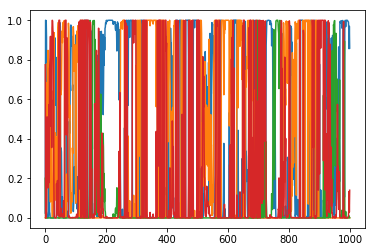

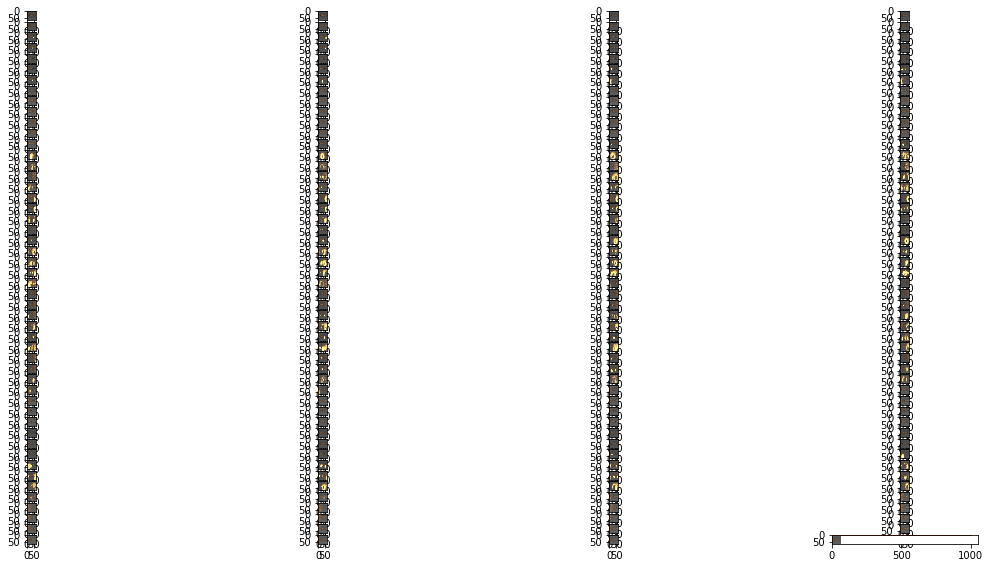

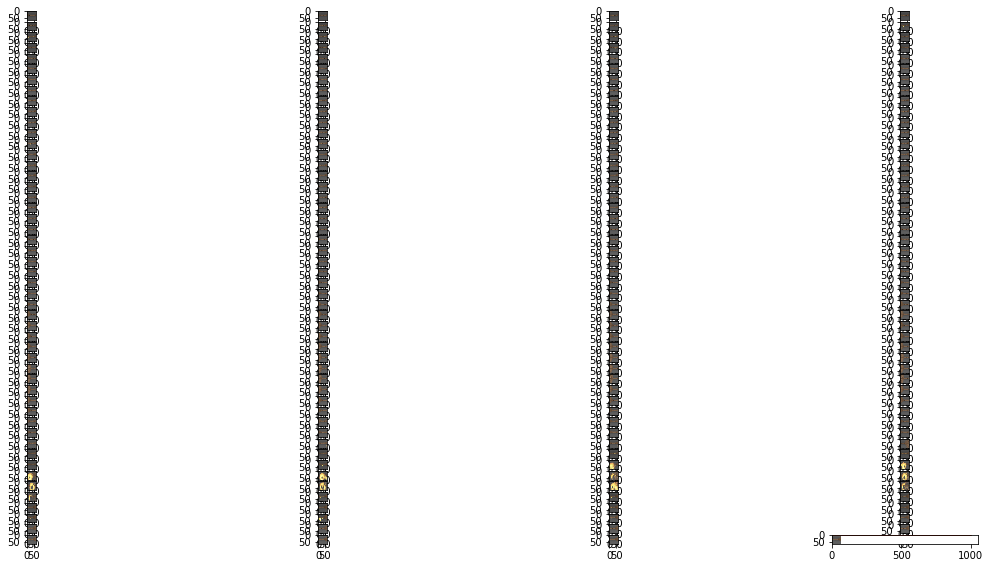

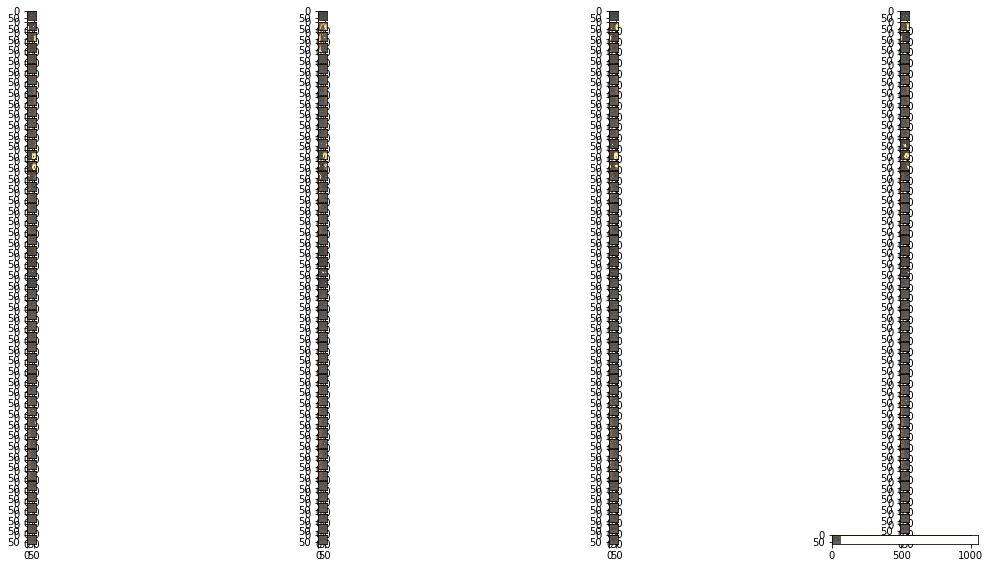

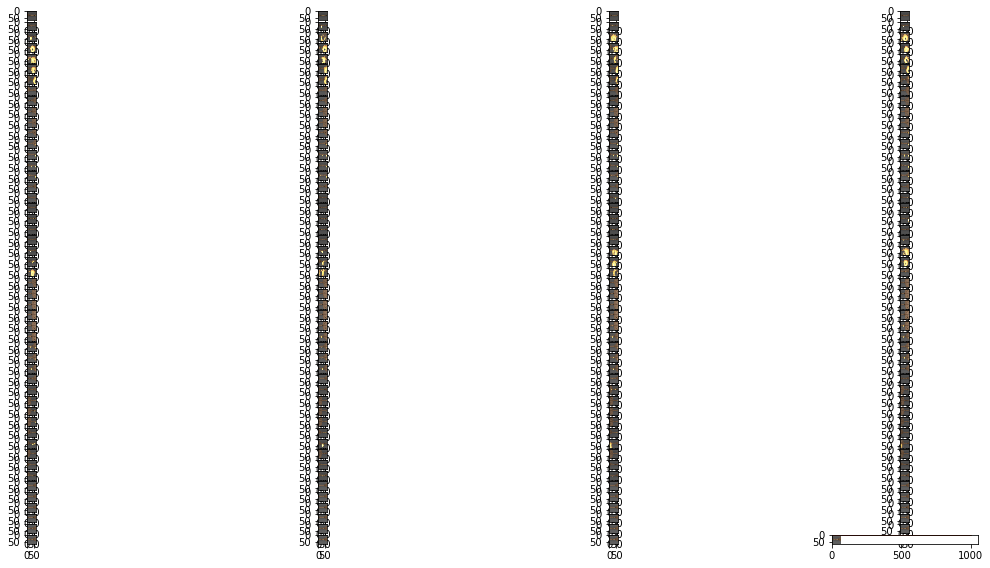

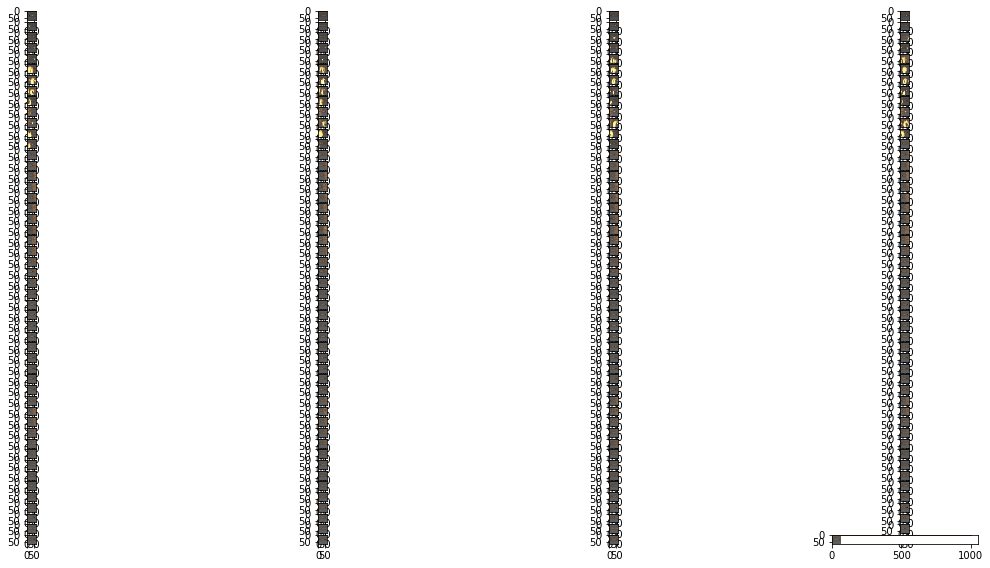

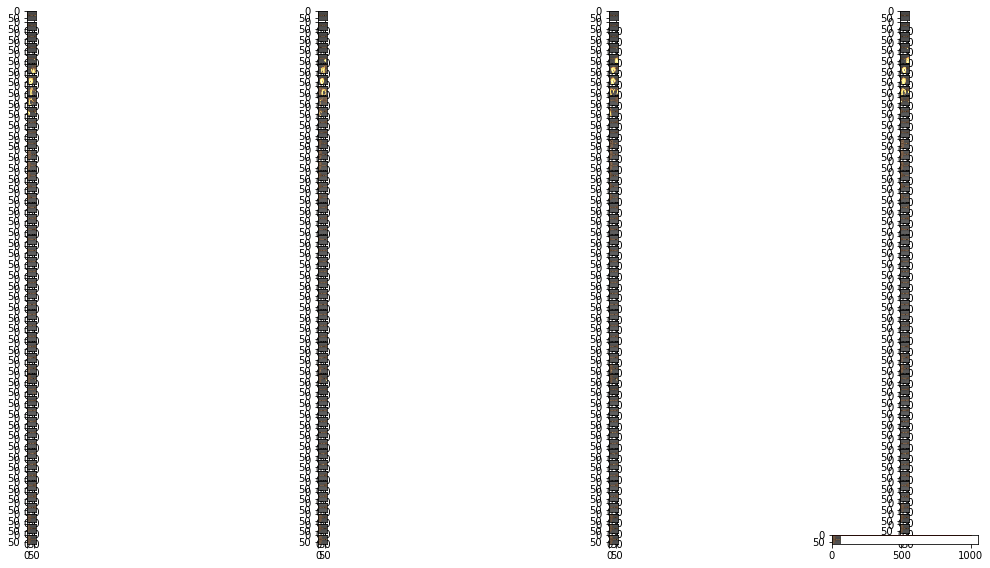

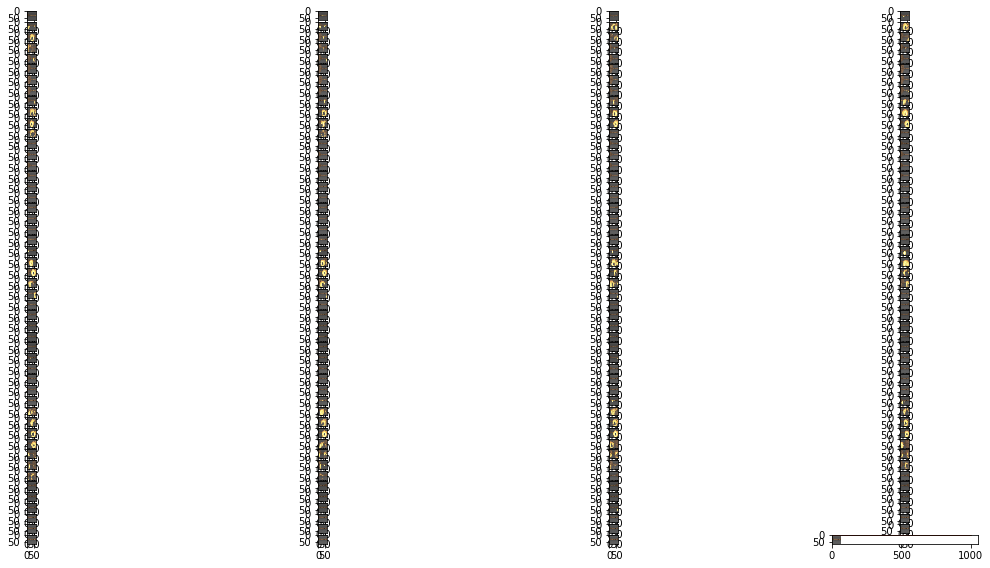

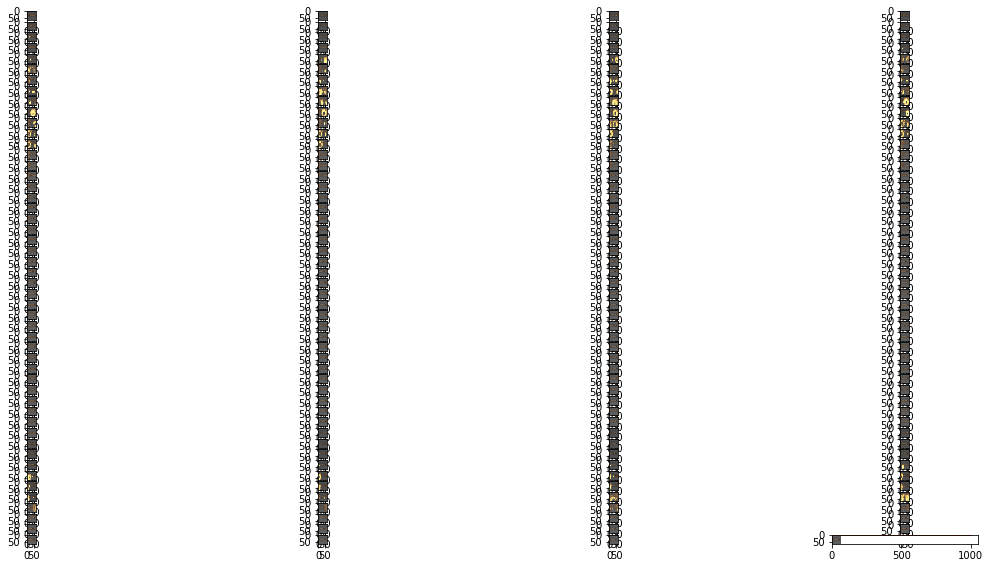

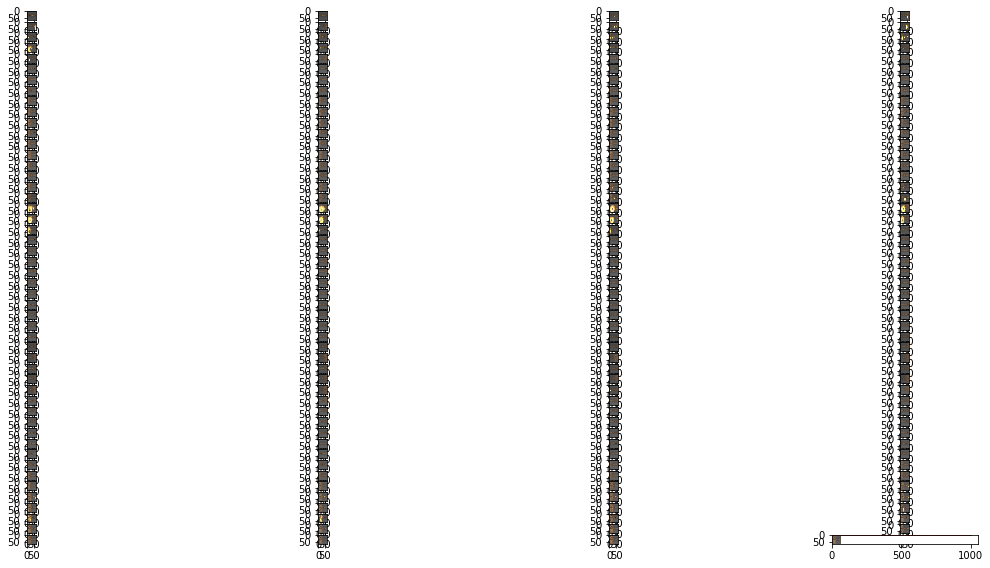

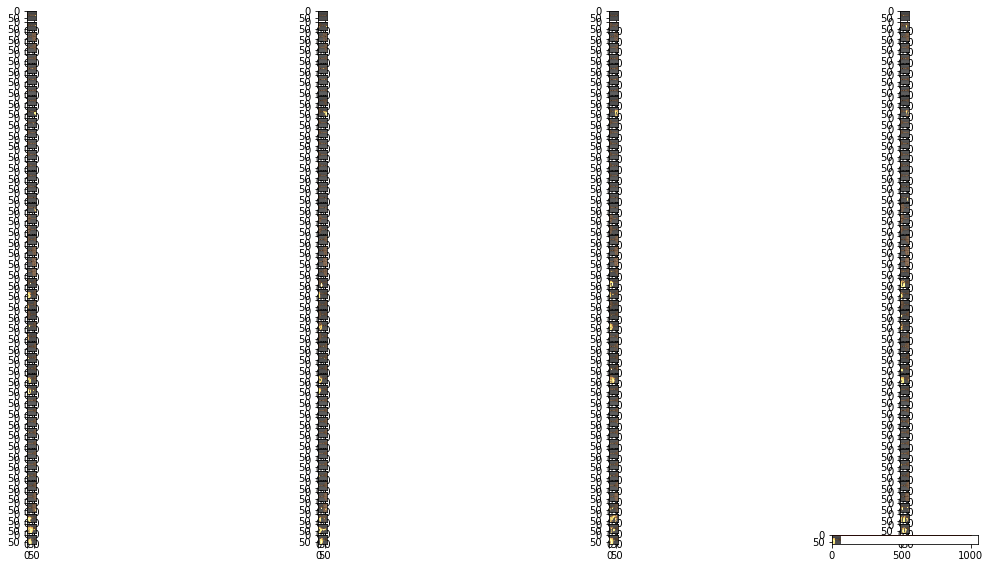

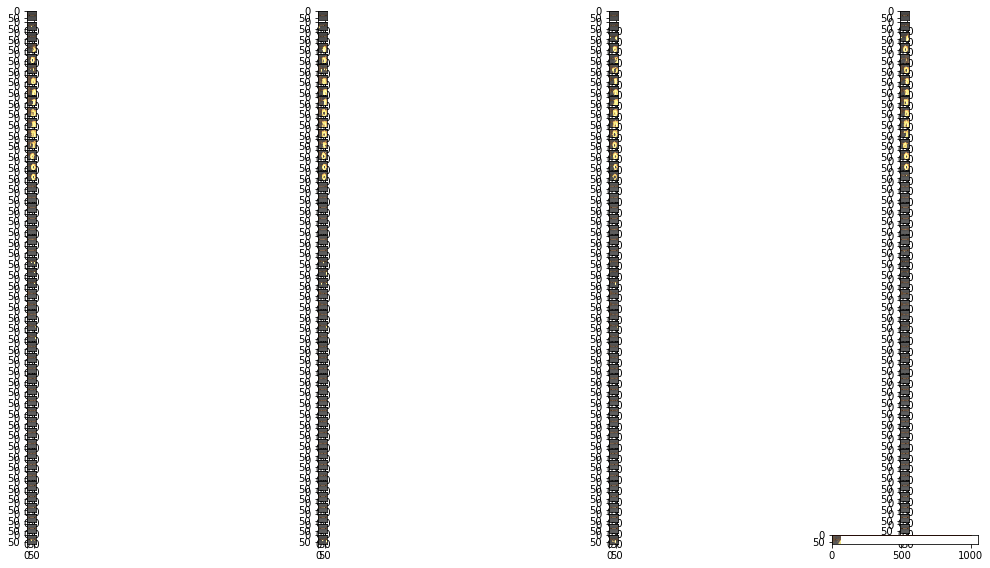

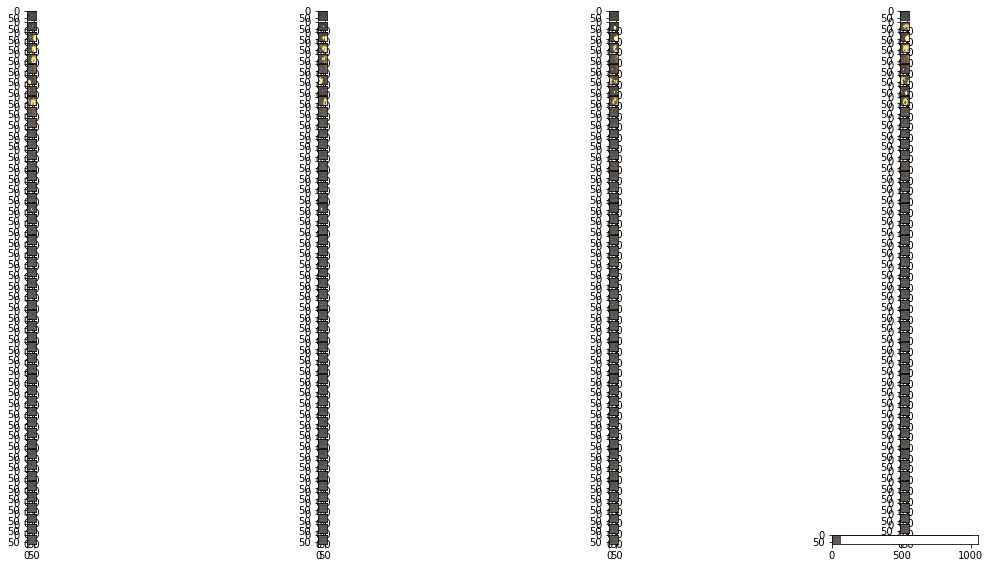

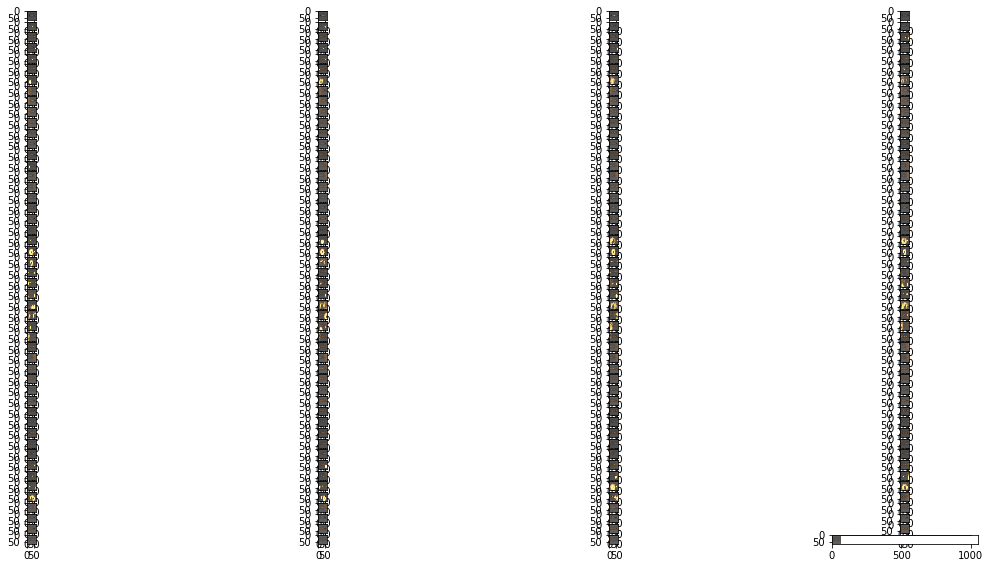

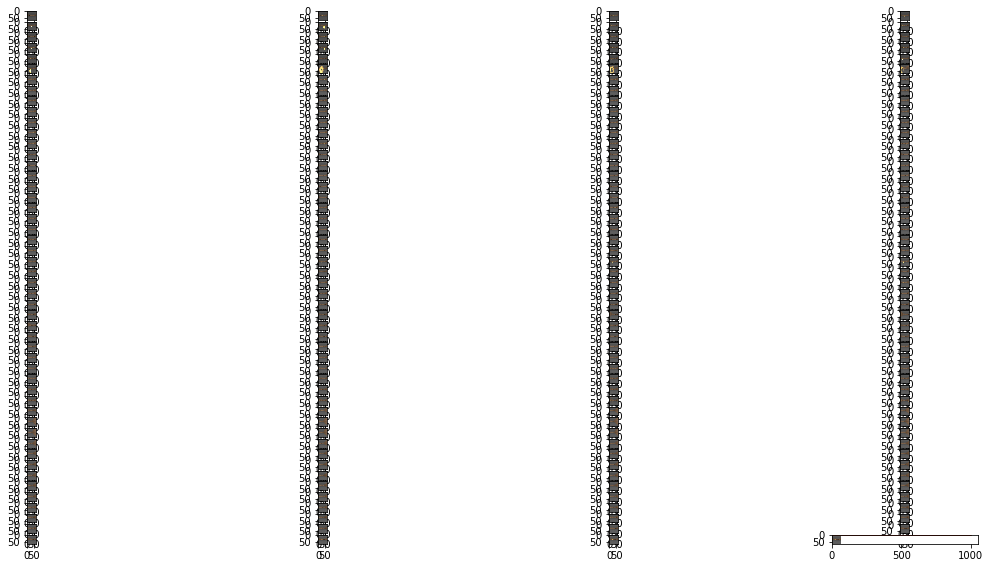

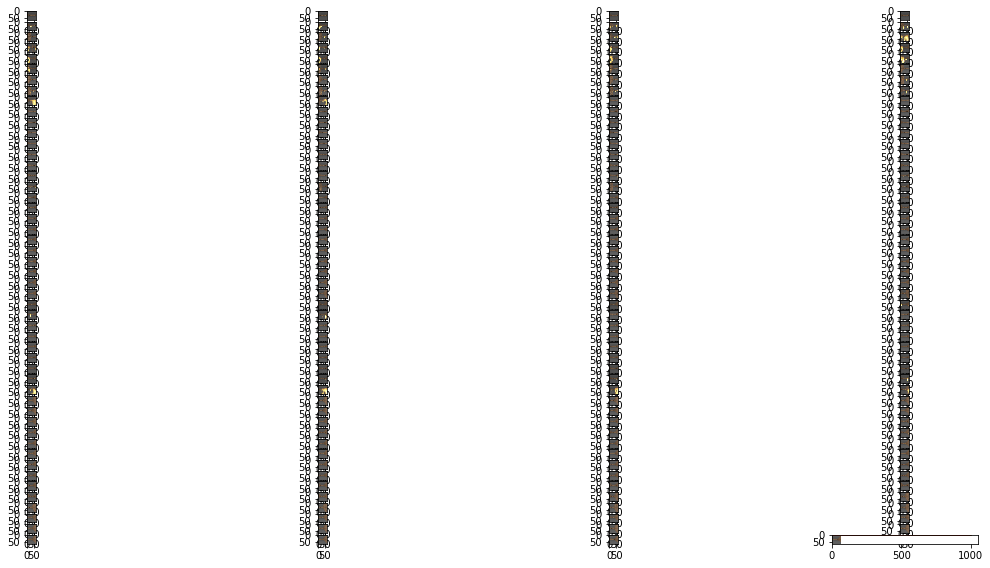

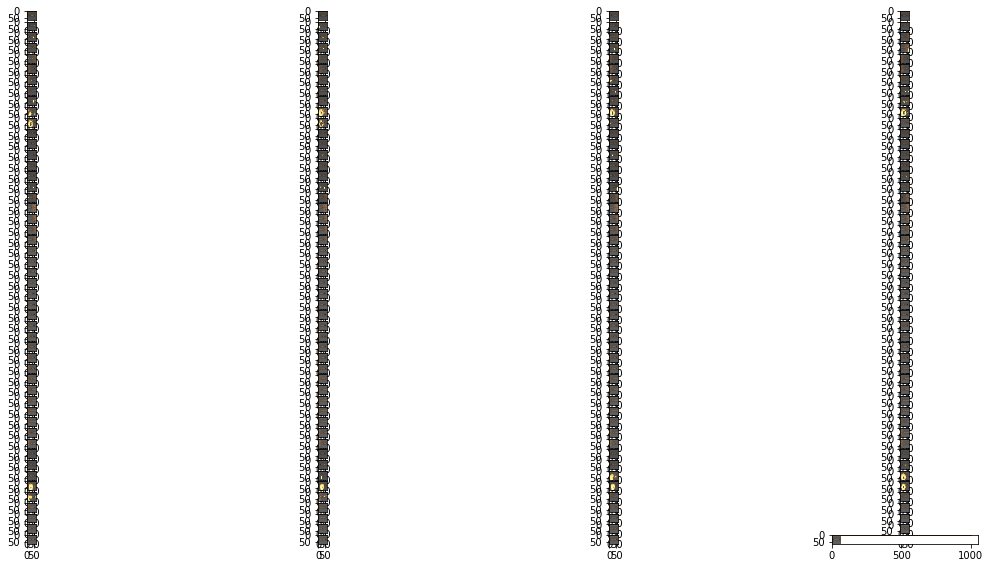

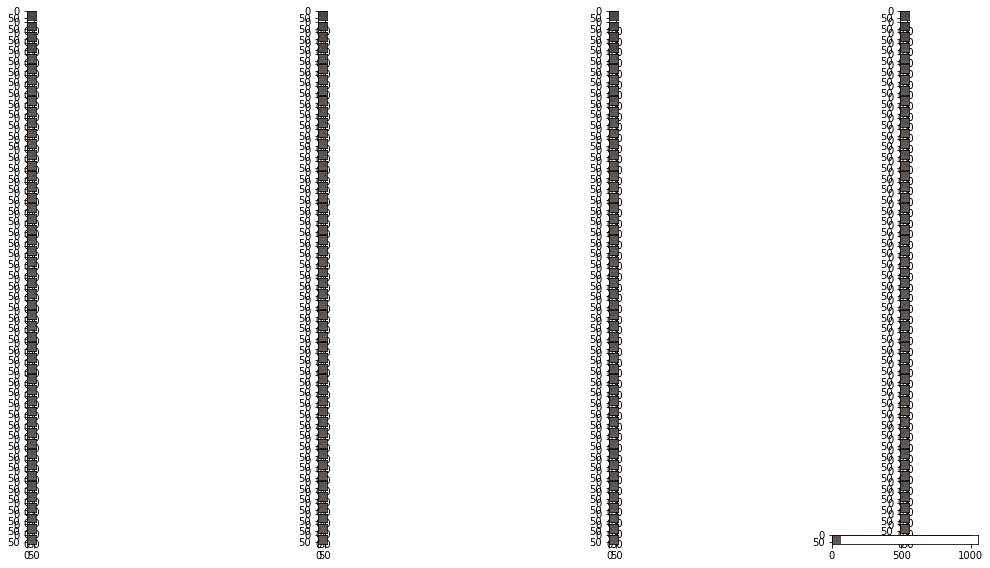

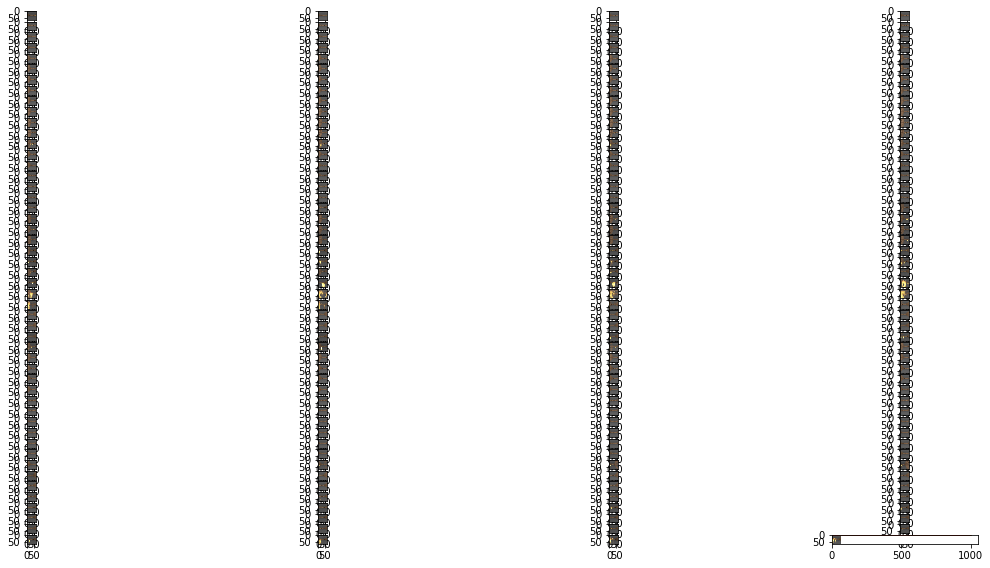

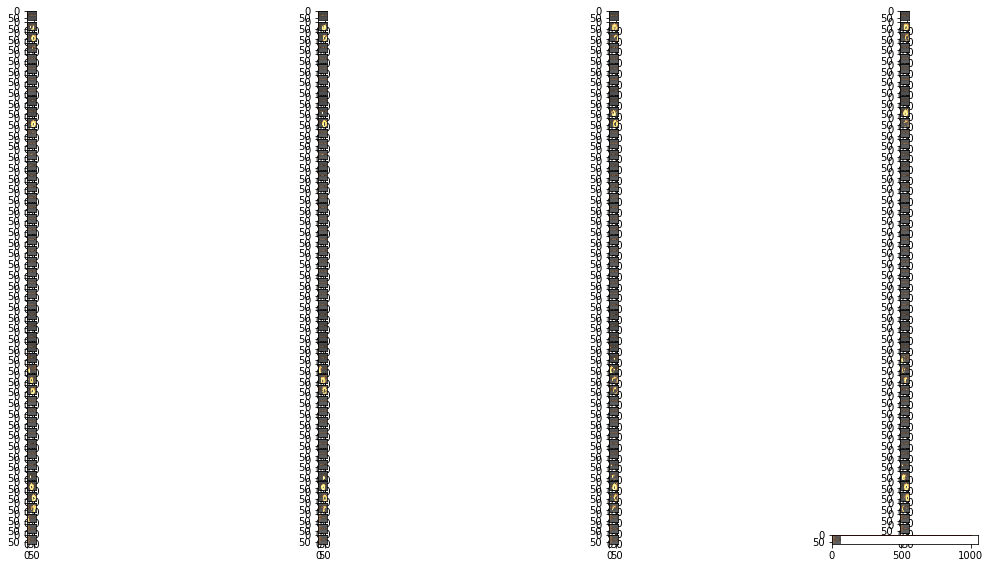

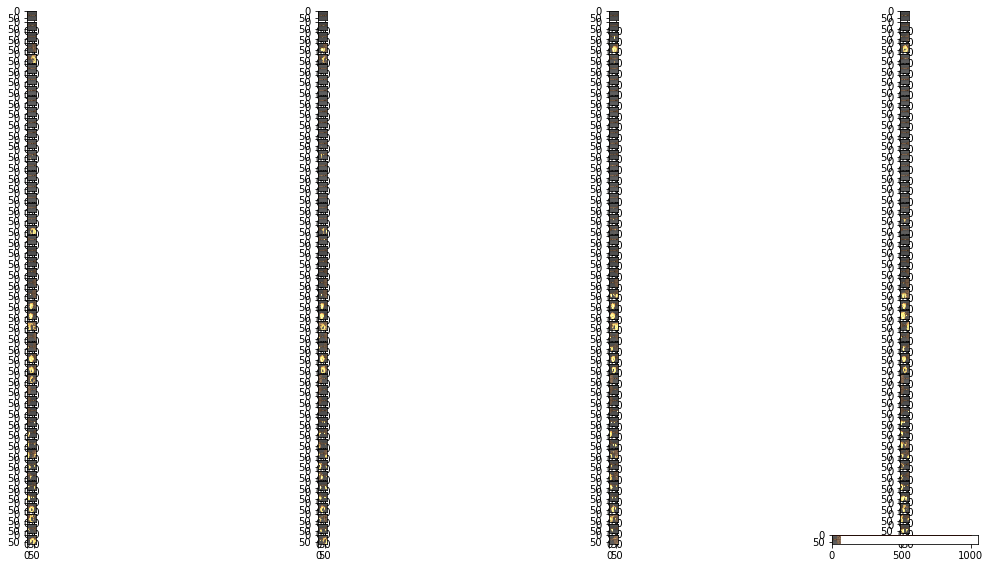

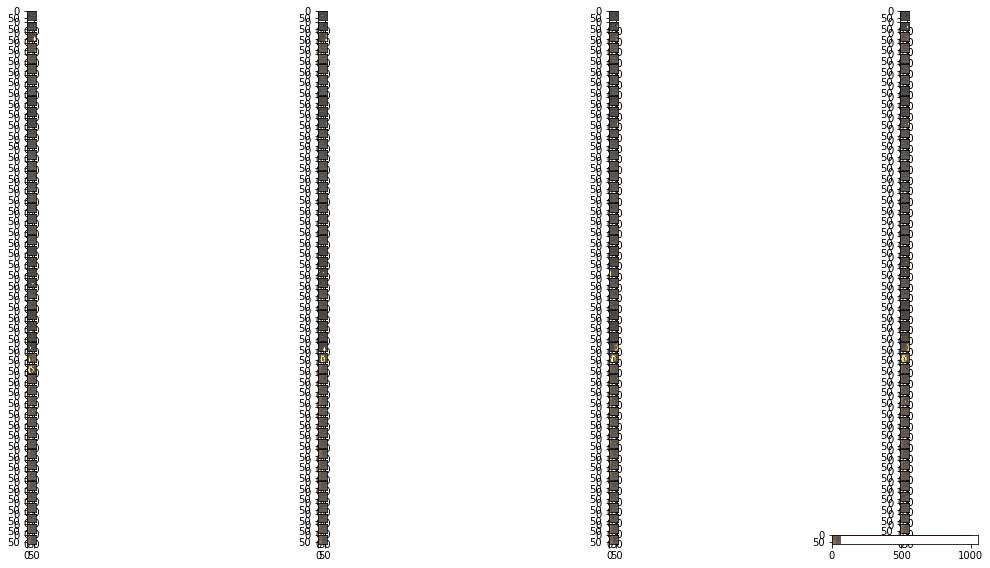

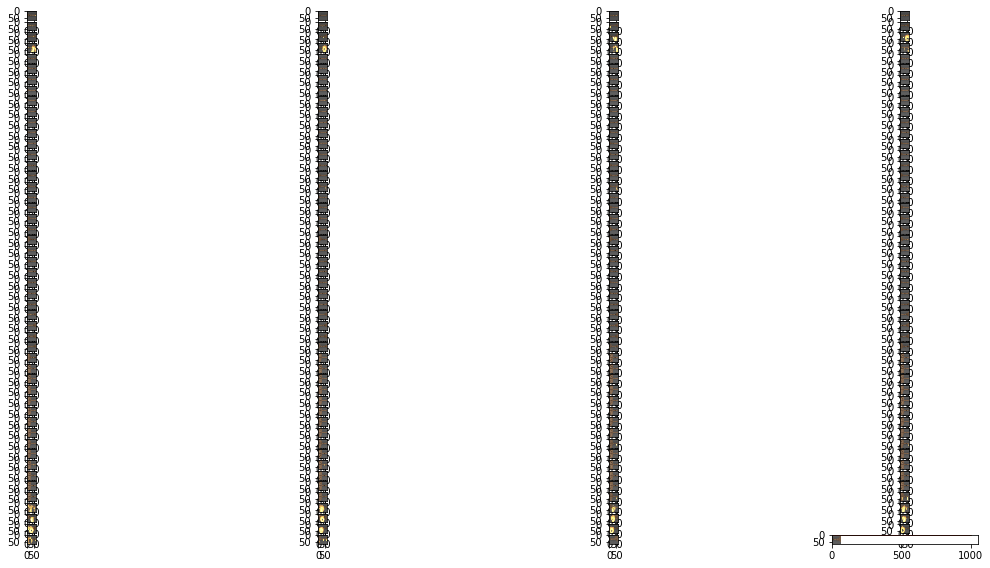

In [ ]:
import pandas as pd
event_to_mixture_summary = []
main_mixture_summary = []
summary_num_events_handled_by_each_mixture = []
STATISTICAL_REPETITIONS = 5
SEQUENCE_LENGTH = 1000
for rep in range(STATISTICAL_REPETITIONS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        print(num_mixtures)
        if num_mixtures!=4:
            continue #Sticking to 4 now.
        for model in rnn_model_list:
            event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(model, 1000)
            event_to_mixture_summary.append(event_to_mixture)
            main_mixture_summary.append(main_mixture)
            num_events_handled_by_each_mixture={}
            for mixture, events in mixture_to_event.items():
                num_events_handled_by_each_mixture[mixture] = len(events)
            summary_num_events_handled_by_each_mixture.append(num_events_handled_by_each_mixture)
    
events_dataframe = pd.DataFrame(event_to_mixture_summary)
mixture_summary_dataframe = pd.DataFrame(main_mixture_summary)
summary_num_events_dataframe = pd.DataFrame(summary_num_events_handled_by_each_mixture)

In [ ]:
print(events_dataframe)
print(main_mixture_summary)
print(summary_num_events_dataframe)

In [ ]:
def count_events_in_main_vs_other_mixtures(events_dataframe, event_name, main_mixture_summary, summary_num_events_dataframe):
    #Helps analyze if one mixture typically takes responsability
    #for analyzing one specific event.
    
    #Counting how often the event is present in the most common mixture,
    #vs all the others.
    event_in_main_mixture = events_dataframe[event_name+"_main"]
    event_in_other_mixtures = events_dataframe[event_name+"_other"]
    id_of_main_mixture = [d[event_name] for d in main_mixture_summary]
    
    total_num_main_mixture = []
    total_num_all_mixtures = []
    summary_num_events_dataframe=summary_num_events_dataframe.fillna(0)
    for index, row in summary_num_events_dataframe.iterrows():
        total_num_main_mixture.append(row[id_of_main_mixture[index]])
        total_num_all_mixtures.append(sum(row))

    total_non_main_mixture = np.subtract(np.array(total_num_all_mixtures), total_num_main_mixture)
    event_proportion_in_main=np.divide(event_in_main_mixture,np.add(event_in_other_mixtures,event_in_main_mixture))
    total_proportion_in_main=np.divide(total_num_main_mixture,total_num_all_mixtures)
                                
                                
    main_mixture_dict = {event_name: event_in_main_mixture,
                  "total" : total_num_main_mixture,
                        "main_mixture": "Yes"}
    non_main_mixture_dict = {event_name: event_in_other_mixtures,
                  "total": total_non_main_mixture,
                                "main_mixture":"No"}
    
    
    #Measures difference between: (Event modelled my MainMixture/TotalNumEvent) and
    #(total modelled by MainMixture/ totalAllEvents)
    main_model_proportion_dict_event = {event_name+"_proportion" : event_proportion_in_main, "event_only" :"Yes"}
    main_model_proportion_dict_total = {event_name+"_proportion": total_proportion_in_main, "event_only" : "No"}
    
    return_frame = pd.DataFrame(main_mixture_dict)
    return_frame_b = pd.DataFrame(non_main_mixture_dict)
    return_frame= return_frame.append(return_frame_b)
    
    main_model_proportion_frame = pd.DataFrame(main_model_proportion_dict_event)
    main_model_proportion_frame_b = pd.DataFrame(main_model_proportion_dict_total)
    main_model_proportion_frame = main_model_proportion_frame.append(main_model_proportion_frame_b)
    return return_frame, main_model_proportion_frame

In [ ]:
from scipy.stats import mannwhitneyu

def significance_test(dataframe, event_name):
    #Does two tests of significance:
    #1. Are there significantly more occurences of event event_name
    #in the "main" mixture than in the others?
    #2. Are there significant differences between the number of total
    #events in the main mixture than others?
    #The latter controls for situations where all/very many events
    #end up being modelled by 1 mixture.
    main_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'Yes']
    other_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'No']
    event_main = main_mixture_data[event_name]
    total_main = main_mixture_data['total']
    event_other = other_mixture_data[event_name]
    total_other = other_mixture_data['total']
    
    print("Significant differences between number of the event in main vs all other mixtures")
    print("Significant differences between number of ANY event in main vs all other mixtures")

    print(mannwhitneyu(event_main, event_other, alternative='two-sided'))
    print(mannwhitneyu(total_main, total_other, alternative='two-sided'))

## Explosions

In [ ]:
explosions_data = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
print(explosions_data)
pd.melt(explosions_data, id_vars=['main_mixture'])

In [ ]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(explosions_data, id_vars=['main_mixture']))



In [ ]:
significance_test(explosions_data, 'explosion')

In [ ]:
sns.boxplot(x="variable", y="value", hue="event_only" data=pd.melt(proportion_frame), id_vars=['event_only'])

## Left Walls

In [50]:
left_walls_data = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(left_walls_data, "left_wall")
#Result: Left wall far more common in main mixture. However, the total
#distribution of this mixture is not significantly larger than others.
pd.melt(left_walls_data, id_vars=['main_mixture'])

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2330.0, pvalue=0.005325690653587102)
MannwhitneyuResult(statistic=1822.0, pvalue=0.9101519270334872)


,main_mixture,variable,value
0,Yes,left_wall,118
1,Yes,left_wall,5
2,Yes,left_wall,119
3,Yes,left_wall,4
4,Yes,left_wall,58
5,Yes,left_wall,480
6,Yes,left_wall,4
7,Yes,left_wall,0
8,Yes,left_wall,139
9,Yes,left_wall,29


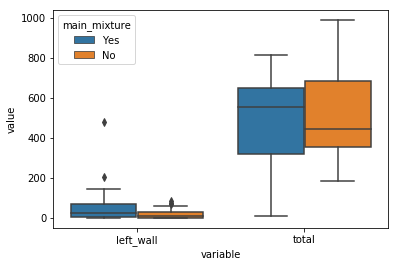

In [51]:
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(left_walls_data, id_vars=['main_mixture']))

## Right Walls

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2300.0, pvalue=0.00809685131047229)
MannwhitneyuResult(statistic=1540.0, pvalue=0.1731865366933063)


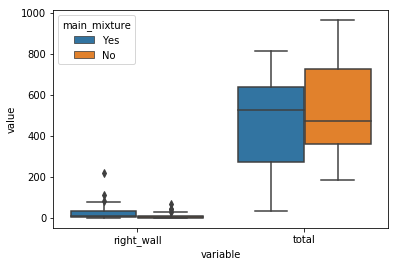

In [52]:
right_walls_data = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(right_walls_data, "right_wall")
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(right_walls_data, id_vars=['main_mixture']))

## Fireballs

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2496.0, pvalue=0.0002616742058439126)
MannwhitneyuResult(statistic=2565.0, pvalue=6.0032784254540274e-05)


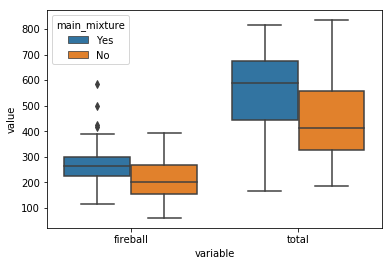

In [53]:
fireball_data = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball", main_mixture_summary, summary_num_events_dataframe)
significance_test(fireball_data, "fireball")
#Fireball more common in main mixture, but this mixture is so dominating
#that this is to be expected.
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fireball_data, id_vars=['main_mixture']))